Работа Хайлова Ильи

In [2]:
import pandas as pd

In [3]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.9.0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:
exited = churn_data[churn_data['Exited'] == 1]['RowNumber'].count()
stayed = churn_data[churn_data['Exited'] == 0]['RowNumber'].count()
print(exited/stayed)
print(churn_data.value_counts())

0.25580811252040686
RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
             

In [43]:
churn_data_ex = churn_data.groupby('RowNumber')['Exited']
# choropleth_data['date'] = choropleth_data['date'].astype('string')
fig = px.pie(churn_data_ex, names=['оставшиеся','ушедшие'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Ответ: Соотношение ушедших к лояльным составляет 0.25580811252040686

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [8]:
churn_data_2500 = churn_data[churn_data['Balance']>2500]


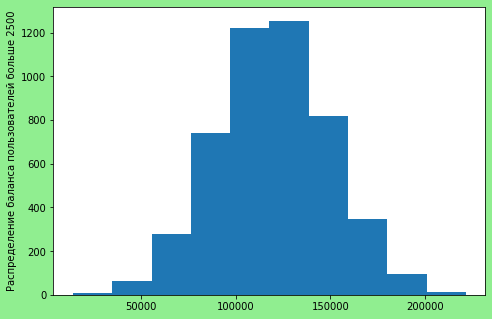

In [9]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(churn_data[(churn_data['Balance'] > 2500) & (churn_data['Exited'] == 0)].groupby('RowNumber')['Balance'].max())
axes.set_ylabel('Распределение баланса пользователей больше 2500');

Выводы: Более 2400 клиентов имеют на счету от 100000 до 150000
Счета менее 50000 и более 200000 являются самыми не распространенными
Распределение нормальное. Аномалий по распределению не наблюдается

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

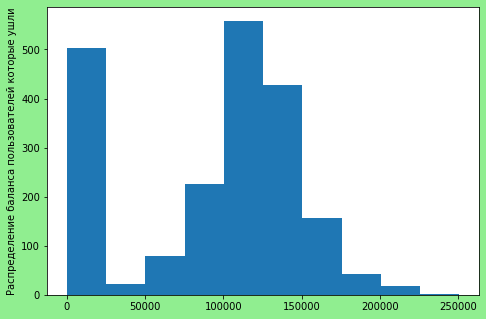

In [10]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(churn_data[(churn_data['Exited'] == 1)].groupby('RowNumber')['Balance'].max())
axes.set_ylabel('Распределение баланса пользователей которые ушли');

Выводы:
1. По гистограмме видно, что существенная часть клиентов ушла с нулем или ококло нуля на счету (что логично, счет опустошен перед закрытием) Но возможно, сто пользователь долго не пользовался счетом и решил его закрыть
2. Большая часть клиентов уходит с самой распространенной суммой (от 100 до 120 тысяч) - тут корреляции не вижу
3. А вот далее интересная сумма от 120 до 150 тысяч является показательной, так как в распределении действующих пользователей она самая высокая. Возможно являясь самой популярной суммой она является самой конкурентной и отток идет в другие банки, дающие лучшие условия. Возможно необходимо следить за услоиями конкурентов

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

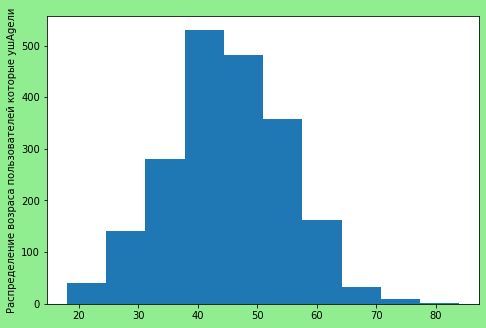

In [11]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(churn_data[(churn_data['Exited'] == 1)].groupby('RowNumber')['Age'].max())
axes.set_ylabel('Распределение возраса пользователей которые ушAgeли');

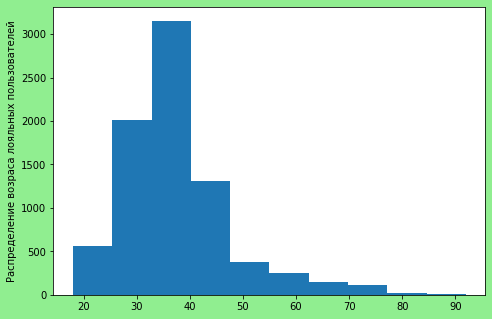

In [12]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(churn_data[(churn_data['Exited'] == 0)].groupby('RowNumber')['Age'].max())
axes.set_ylabel('Распределение возраса лояльных пользователей');

Выводы:
1.Если сравнивать распределение лояльных и ушедших, то самые активные уходящие это возрастная группа 45-55
2. Также сороколенние часто уходят 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

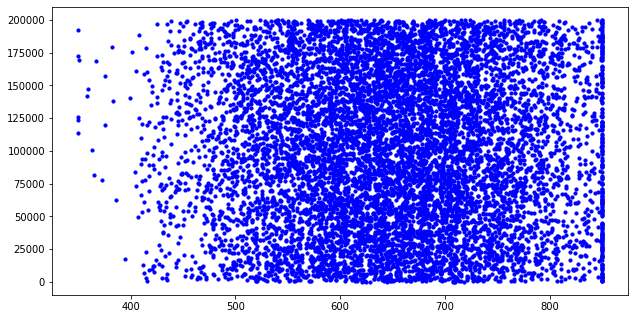

In [13]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=churn_data['CreditScore'], 
    y=churn_data['EstimatedSalary'], 
    s=10,
    marker='o',
    c = 'blue'
);

In [27]:
import seaborn as sns
print(sns.__version__)

0.11.2


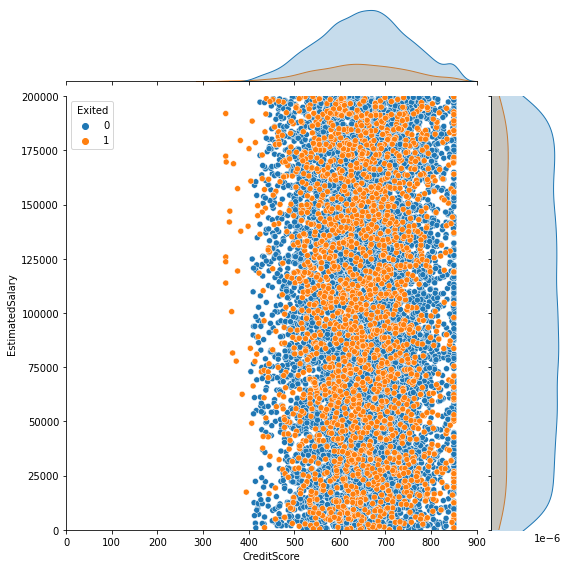

In [28]:

jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (0, 900),
    ylim = (0, 200000),
    height=8,
)

Выводы:
Что бросилось в глаза, это распределение кредитного рейтинга ушедших смещено немного левее чем лояльных. Минимальные рейтинги преимущественно у ушедших, причем чем выше зарплата, тем чаше встречаются ушедшие с низким рейтингом. Только к группе с доходом до 25000 минимальный рейтинг лояльных ниже минимального рейтинга ушедших

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
men = churn_data[churn_data['Gender'] == 'Male']
women = churn_data[churn_data['Gender'] == 'Female']
print((men[men['Exited'] == 1].count())/(men[men['Exited'] == 0].count()))
print((women[women['Exited'] == 1].count())/(women[women['Exited'] == 0].count()))


RowNumber          0.196973
CustomerId         0.196973
Surname            0.196973
CreditScore        0.196973
Geography          0.196973
Gender             0.196973
Age                0.196973
Tenure             0.196973
Balance            0.196973
NumOfProducts      0.196973
HasCrCard          0.196973
IsActiveMember     0.196973
EstimatedSalary    0.196973
Exited             0.196973
dtype: float64
RowNumber          0.334606
CustomerId         0.334606
Surname            0.334606
CreditScore        0.334606
Geography          0.334606
Gender             0.334606
Age                0.334606
Tenure             0.334606
Balance            0.334606
NumOfProducts      0.334606
HasCrCard          0.334606
IsActiveMember     0.334606
EstimatedSalary    0.334606
Exited             0.334606
dtype: float64


Вывод: женщины уходят чаще мужчин: 33% против 20%

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

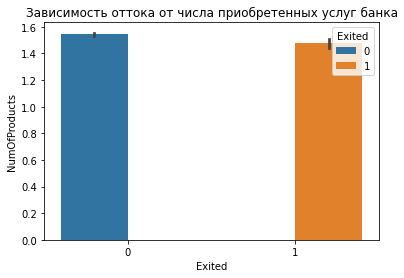

In [ ]:
barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='NumOfProducts',
    hue='Exited',
)
barplot.set_title('Зависимость оттока от числа приобретенных услуг банка');

Вывод: У ушедших клиентов среднее количество приобретенных услуг ниже, чем у лояльных. Напрашивается вывод, что большее количество проданных услуг увеличивает удержание клиента

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

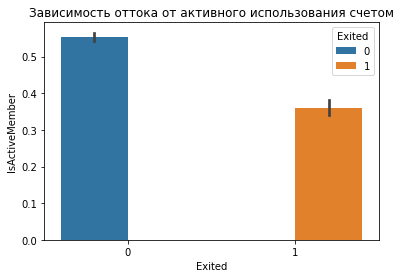

In [ ]:

barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='IsActiveMember',
    hue='Exited',
)
barplot.set_title('Зависимость оттока от активного использования счетом');

Вывод: более трети неактивных клиентов покинули банк. Количество активных пользователей немного более половины. Необходимо увеличивать привлечение клиентов к услугам  банка, чтобы не потерять их в будущем

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [30]:

# churn_data['Countries'] = churn_data.groupby('Geography')['Exited'].sum()

# fig = px.choropleth(
#     data_frame=churn_data, #DataFrame
#     locations="Geography", #столбец с локациями
#     locationmode = "country names", #режим сопоставления локаций с базой Plotly
#     color="Countries", #от чего зависит цвет
#     # animation_frame="date", #анимационный бегунок
#     range_color=[0, 30e6], #диапазон цвета
#     title='Global exits number', #заголовок
#     width=800, #ширина
#     height=500, #высота
#     color_continuous_scale='Reds' #палитра цветов
# )

# #отображаем график
# fig.show()
choropleth_data = churn_data.groupby(['Geography'])['Exited'].mean()
#print(choropleth_data)

fig = px.choropleth(
    data_frame=choropleth_data,
    locations=choropleth_data.index,
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета, доли находятся в интервале от 0 до 1
    title='Доля ушедщих клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

Вывод: у Германии доля ушедших клиентов практически в два раза больше чем у Испании и Франции. Возможно в Германии состредоточено более экономически активное население с бОльшей конкуренцией в банковском секторе

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [22]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [23]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [31]:
# pivot = churn_data.pivot_table(
#     values= churn_data[churn_data['Exited'] == 1].mean(),
#     columns='Tenure',
#     index='CreditScoreCat',
# )
pivot = churn_data.pivot_table(values ='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')


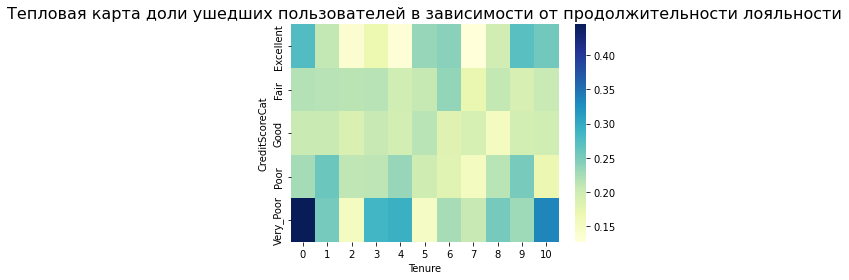

In [32]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта доли ушедших пользователей в зависимости от продолжительности лояльности', fontsize=16);

Вывод: 
1. чаще всего уходят клиенты вновь пришедшие с минимальным кредитным рейтингом. Это говорит о работе службы безопаности банка, которая отказывает в услугах клиентам с самым низким рейтингом. Стоимт отметить также для этой группы высокую частоту выходов на десятом году. Возможно требуются дополнительные действия банка по удержанию этой группы
2. Также стоит обратить внимание на группу с Excelent - доля ушедших клиентов в первый год составляет около 0.3. Более пристальное внимание к таким клиентам стоит уделить на 9 и 10 годах, когда доля выхода сопоставима с долей в первом году